Imaplimentation of X-gate, Y-gate, Z-gate

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from IPython.display import display

In [2]:
def run_and_plot(qc):
    display(qc.draw('mpl'))
    sim = AerSimulator()
    job = sim.run(qc)
    counts = job.result().get_counts()
    print(counts)
    display(plot_histogram(counts))
    

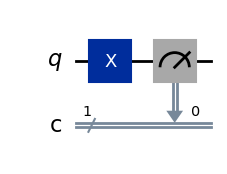

{'1': 1024}


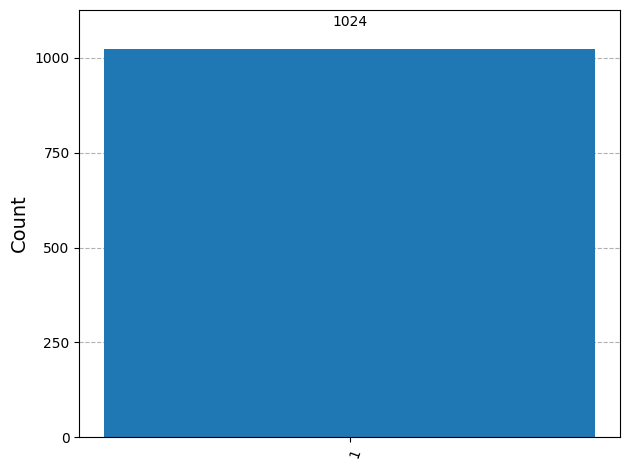

In [3]:
#x gate
qc_x = QuantumCircuit(1, 1)
qc_x.x(0)
qc_x.measure(0, 0)
run_and_plot(qc_x)

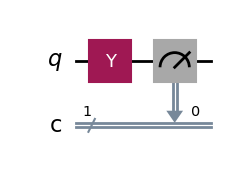

{'1': 1024}


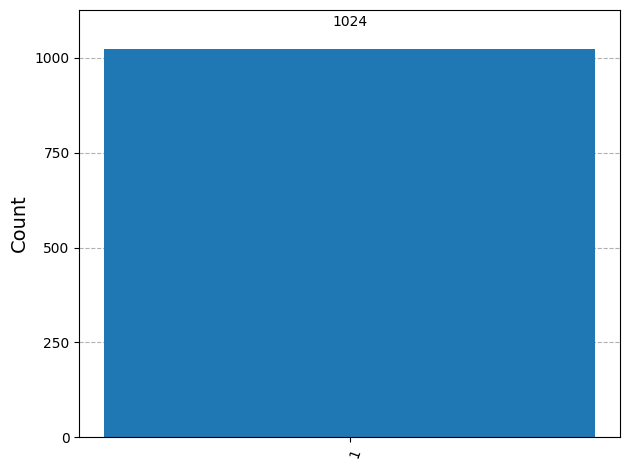

In [4]:
# Y gate
qc_y = QuantumCircuit(1, 1)
qc_y.y(0)
qc_y.measure(0, 0)
run_and_plot(qc_y)

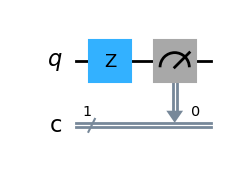

{'0': 1024}


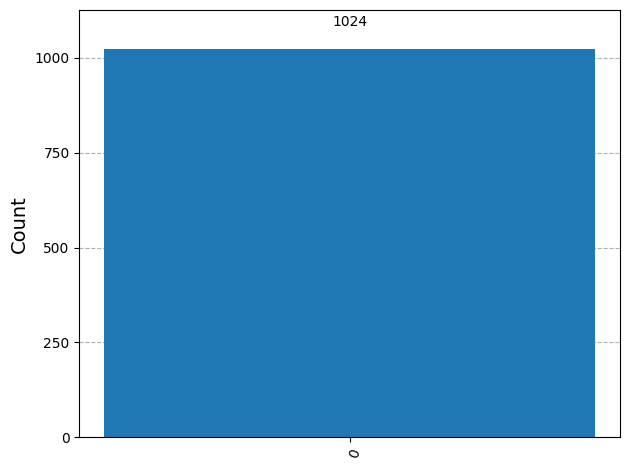

In [5]:
 
# Z gate (note: measurement result is not changed, but phase is!)
qc_z = QuantumCircuit(1, 1)
qc_z.z(0)
qc_z.measure(0, 0)
run_and_plot(qc_z)

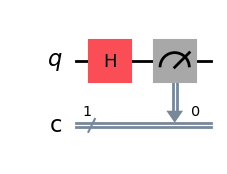

{'0': 483, '1': 541}


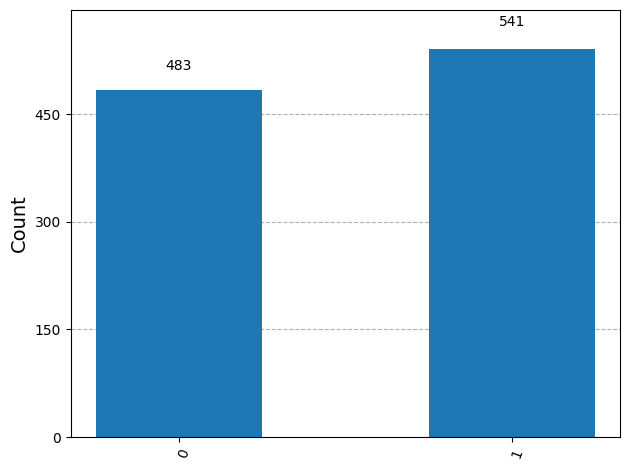

In [6]:
# Hadamard gate
qc_h = QuantumCircuit(1, 1)
qc_h.h(0)
qc_h.measure(0, 0)
run_and_plot(qc_h)

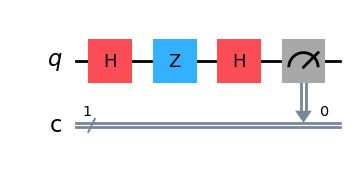

{'1': 1024}


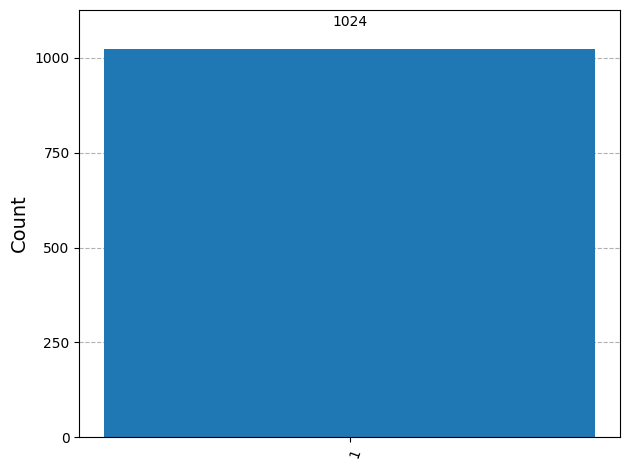

In [7]:
qc_phase = QuantumCircuit(1, 1)
qc_phase.h(0)    # Superposition
qc_phase.z(0)    # Phase flip
qc_phase.h(0)    # Bring phase back to measurement basis
qc_phase.measure(0, 0)
run_and_plot(qc_phase)

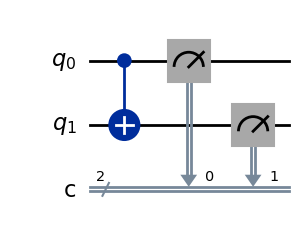

{'00': 1024}


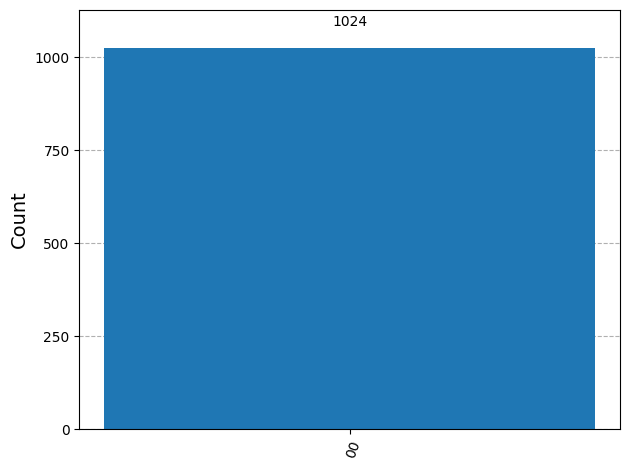

In [8]:
#CNOT gate case 1: Control = |0⟩

qc_cnot0 = QuantumCircuit(2, 2)
# Both start in |0>
qc_cnot0.cx(0, 1)             # CNOT: control=0, so nothing happens to target
qc_cnot0.measure([0, 1], [0, 1])
run_and_plot(qc_cnot0)

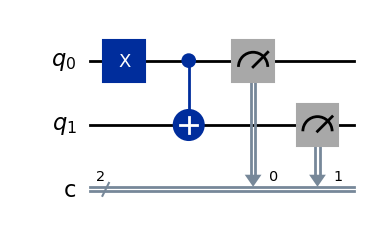

{'11': 1024}


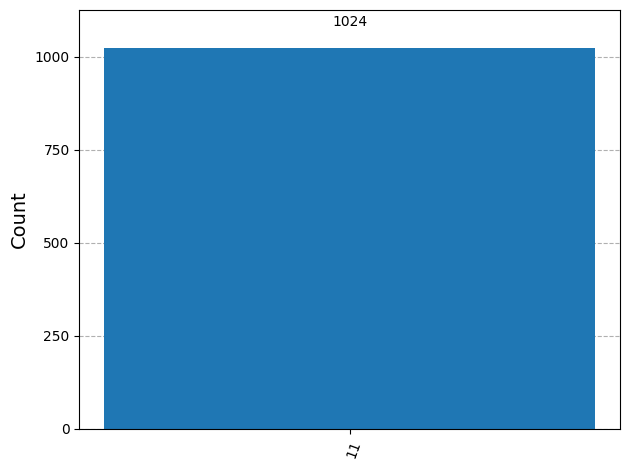

In [9]:
#CNOT gate case 2:Control = |1⟩
qc_cnot1 = QuantumCircuit(2, 2)
qc_cnot1.x(0)                 # Put control qubit in |1>
qc_cnot1.cx(0, 1)             # Now, control=1, so target is flipped
qc_cnot1.measure([0, 1], [0, 1])
run_and_plot(qc_cnot1)

Case 3: Control in Superposition (Entanglement)

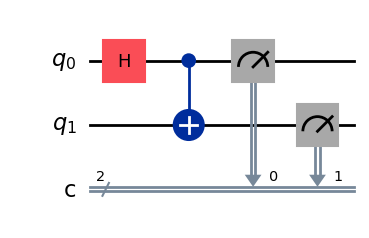

{'00': 534, '11': 490}


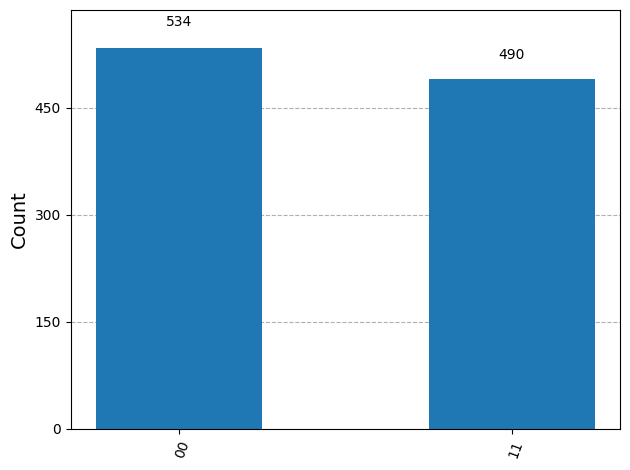

In [10]:
qc_entangle = QuantumCircuit(2, 2)
qc_entangle.h(0)              # Put control qubit into superposition
qc_entangle.cx(0, 1)          # Entangles the qubits!
qc_entangle.measure([0, 1], [0, 1])
run_and_plot(qc_entangle)
